<a href="https://colab.research.google.com/github/hruivnewuin/Faith_INFO4670_Spring2026-/blob/main/Assignment_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.

#1. Data Quality Check

1.1 Using Python (pandas, matplotlib, or seaborn), load and inspect the Assignment 2 dataset.

In [ ]:
# Write your code here

from google.colab import files
uploaded = files.upload()


Saving Assignment 2 dataset.csv to Assignment 2 dataset.csv


Write code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.

In [ ]:
# Write your code here

import pandas as pd

df = pd.read_csv("Assignment 2 dataset.csv")
print('Shape:', df.shape)
df.head()



Shape: (18254, 14)


,Column 1,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12-27-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12-20-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12-13-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12-6-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11-29-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


1.2 Write Python code to check for duplicate rows and missing values in the dataset. Show the number of duplicates and missing values for each column. Then, explain (in comments or markdown) how you would handle these issues (e.g., drop, impute, or replace).

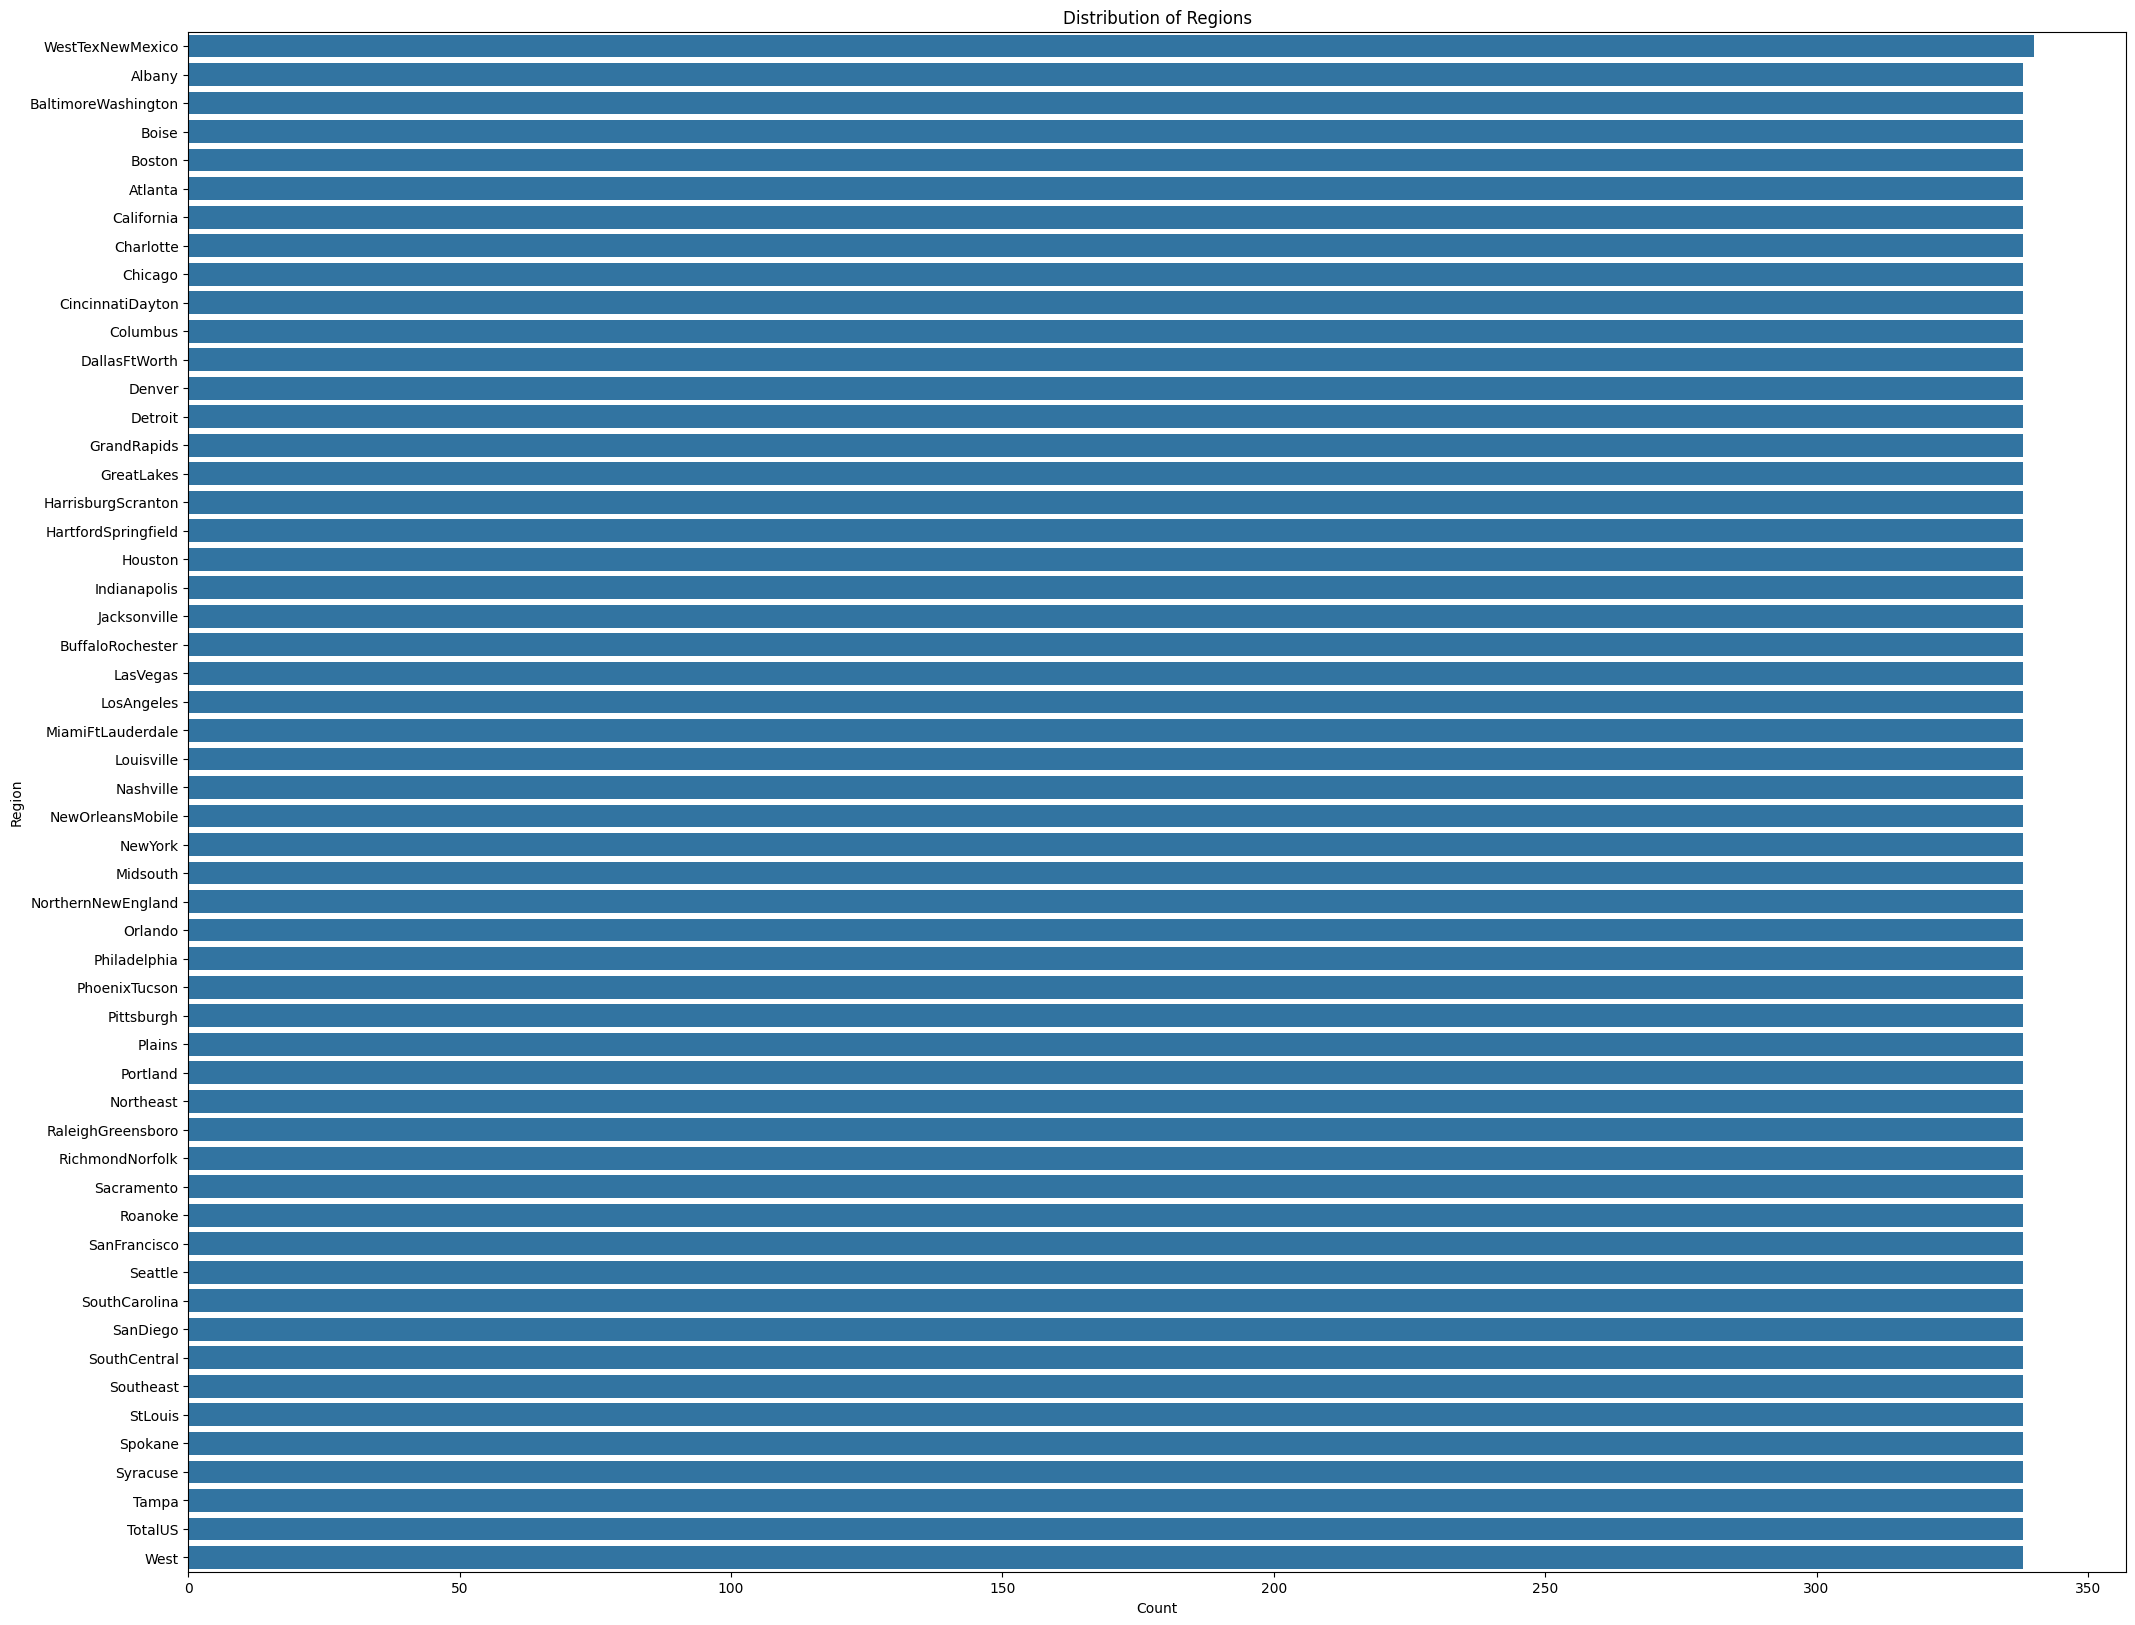

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 20))
sns.countplot(y='region', data=df, order=df['region'].value_counts().index)
plt.title('Distribution of Regions')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

In [ ]:
duplicate_rows = df.duplicated().sum()
print('Number of duplicate rows:', duplicate_rows.sum())

missing_values = df.isnull().sum()
print('\nMissing values per column:')
print(missing_values)



Number of duplicate rows: 2

Missing values per column:
Column 1        0
Date            0
AveragePrice    0
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
year            0
region          0
dtype: int64


1.3 Use Python code to print the number of rows and columns in the dataset (e.g., with df.shape). Based on the dataset size, explain (briefly) whether you think the dataset is sufficient for training a machine learning model.

In [ ]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])


Number of rows: 18254
Number of columns: 14


#2. Data Cleaning and Preprocessing

2.1 Remove the first column or “Column 1” from the dataset. Treat the ‘year’ variable as nominal.

In [ ]:
import pandas as pd

df = pd.read_csv("Assignment 2 dataset.csv")
df = df.drop(columns=['Column 1'], errors='ignore')

df['year'] = df['year'].astype('category')

print(df.head())

         Date  AveragePrice  Total Volume     4046       4225    4770  \
0  12-27-2015          1.33      64236.62  1036.74   54454.85   48.16   
1  12-20-2015          1.35      54876.98   674.28   44638.81   58.33   
2  12-13-2015          0.93     118220.22   794.70  109149.67  130.50   
3   12-6-2015          1.08      78992.15  1132.00   71976.41   72.58   
4  11-29-2015          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany  


2.2 Check for duplicate values and remove them.

In [ ]:
df.drop_duplicates(inplace=True)

New shape of the dataset after removing duplicates: (18252, 14)


2.3 Check for missing values. If a data record (row) only has a few missing values, replace the missing values with the median of the column feature in that specific “Region” variable. If most column values in a data record are missing, remove the data record.

In [68]:
initial_missing_values = df.isnull().sum()


missing_per_row = df.isnull().sum(axis=1)

threshold = df.shape[1] / 2
rows_to_drop = missing_per_row[missing_per_row >= threshold].index
impute_rows = missing_per_row[(missing_per_row < threshold) & (missing_per_row > 0)].index # Renamed 'impute' to 'impute_rows' to avoid potential conflict

if not rows_to_drop.empty:
  df.drop(rows_to_drop, inplace=True)

numerical_columns = df.select_dtypes(include=['number']).columns[df.select_dtypes(include=['number']).nunique() > 1] # Added closing square bracket

for column in numerical_columns:
  if 'region' in df.columns:
    df[column] = df.groupby('region')[column].transform(lambda x: x.fillna(x.median()))
  else:
    df[column] = df[column].fillna(df[column].median())
print(df.isnull().sum())


Column 1        0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


2.4 Find the correlation between the variables and describe how the correlated values among the variables impact the model accuracy.


Correlation Matrix:
              AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192767 -0.208325 -0.172944 -0.179458   
Total Volume     -0.192767      1.000000  0.977863  0.974181  0.872203   
4046             -0.208325      0.977863  1.000000  0.926110  0.833390   
4225             -0.172944      0.974181  0.926110  1.000000  0.887856   
4770             -0.179458      0.872203  0.833390  0.887856  1.000000   
Total Bags       -0.177103      0.963047  0.920057  0.905788  0.792315   
Small Bags       -0.174742      0.967238  0.925280  0.916032  0.802734   
Large Bags       -0.172953      0.880640  0.838646  0.810016  0.698473   
XLarge Bags      -0.117604      0.747158  0.699378  0.688810  0.679862   

              Total Bags  Small Bags  Large Bags  XLarge Bags  
AveragePrice   -0.177103   -0.174742   -0.172953    -0.117604  
Total Volume    0.963047    0.967238    0.880640     0.747158  
4046            0.920057    0.925280    0.83864

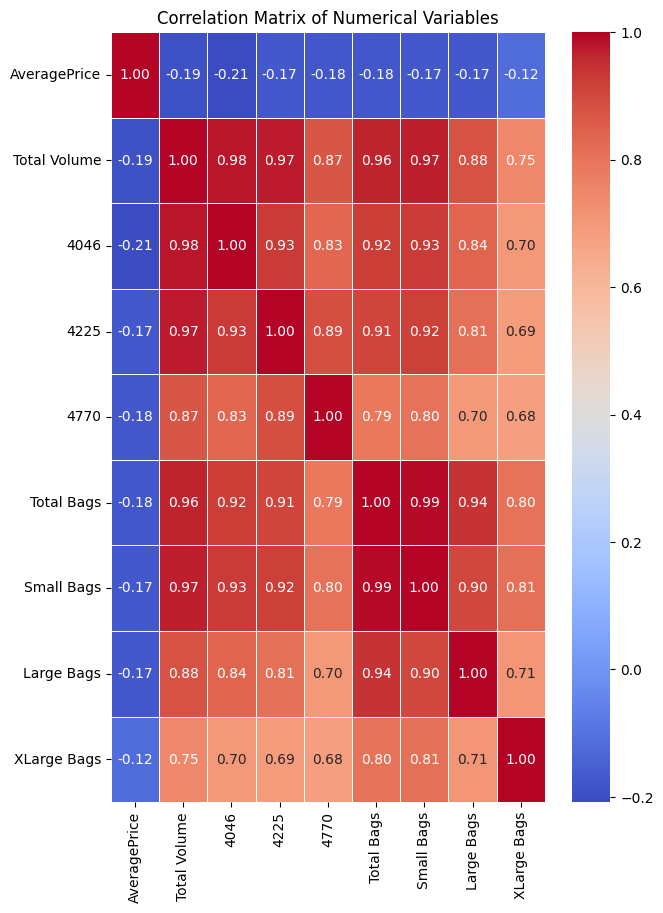

In [75]:

import seaborn as sns
import matplotlib.pyplot as plt

df = df.drop(columns=['Column 1'], errors='ignore')
df['year'] = df['year'].astype('category')
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()
print(f"Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(7, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Using a correlation matrix and heatmap there are highly correlated values. AveragePrice shows a weak negative correlation with other values. This suggests that as volume increases, average price tends to decrease.


#3. Exploratory Data Analysis (EDA)


3.1 Describe the variables
- Describe all variables in the dataset.
- For continuous variables: report **range (min, max), mean, median, and distribution**.
- For categorical variables: list unique values.

In [97]:
continuous_vars = df.describe().T[['min', 'max', 'mean', '50%','std']]
continuous_vars.columns = ['min', 'max', 'mean', 'median', 'distribution']
print("\nContinuous Variables Description")
print(continuous_vars)

print("\nContinuous Variables Description")
print(f"Types: {df['type'].unique()}")
print(f"Years: {df['year'].unique()}")
print(f"Regions: {df['region'].nunique()}")




Continuous Variables Description
                min          max           mean     median  distribution
AveragePrice   0.44         3.25       1.406020       1.37  4.026754e-01
Total Volume  84.56  62505646.52  850552.312103  107354.25  3.453367e+06
4046           0.00  22743616.17  292983.953737    8645.30  1.264922e+06
4225           0.00  20470572.61  295122.546831   29056.73  1.204058e+06
4770           0.00   2546439.11   22837.273030     184.99  1.074584e+05
Total Bags     0.00  19373134.37  239613.964021   39738.53  9.861913e+05
Small Bags     0.00  13384586.80  182178.418161   26362.82  7.461393e+05
Large Bags     0.00   5719096.61   54332.331965    2647.71  2.439532e+05
XLarge Bags    0.00    551693.65    3106.086096       0.00  1.769196e+04

Continuous Variables Description
Types: ['conventional' 'organic']
Years: [2015, 2016, 2017, 2018, 1904]
Categories (5, int64): [1904, 2015, 2016, 2017, 2018]
Regions: 54


3.2 Inspect the earliest recorded date
- Find the earliest `Date`.
- Check if there are avocado prices recorded from the earliest date up to 2010.
- Comment: does the earliest data point look reasonable? Keep or remove?

In [108]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
earliest_date = df['Date'].min()
print(f"The earliest recorded date in the dataset is: {earliest_date}")

data_2010 = df[df['Date'].dt.year < 2010]
print("Data from the year 2010:")
print(data_2010)

The earliest recorded date in the dataset is: 1904-01-21 00:00:00
Data from the year 2010:
            Date  AveragePrice  Total Volume     4046     4225    4770  \
18250 1904-01-21          1.87      13766.76  1191.92  2452.79  727.94   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18250     9394.11      9351.8       42.31          0.0  organic  1904   

                 region  
18250  WestTexNewMexico  


I think we should remove this data point since it is a improbable and isolated record that doesn't align with the rest of our data.

3.3 Highest average price
- Find the highest value in "AveragePrice".
- Report which region it belongs to.
- Describe how you obtained the result.

In [110]:
highest_average_price = df['AveragePrice'].max()
regions_with_highest_price = df[df['AveragePrice'] == highest_average_price]['region'].unique()

print(f"The highest average price is: ${highest_average_price}")
print(f"It's Region: {', '.join(regions_with_highest_price)}")


The highest average price is: $3.25
It's Region: SanFrancisco


Using the .max() command on the AveragePrice Column to determine the highest value. Then I filtered the dataframe to find the row that matched the highest value.

3.4 Highest total volume
- Find the highest total volume of avocados.
- Report which region it belongs to.
- Describe how you obtained the result.

In [118]:
highest_total_volume = df['Total Volume'].max()
regions_highest = df[df['Total Volume'] == highest_total_volume]['region'].unique()

print(f"The highest total volume is: {highest_total_volume:,}")
print(f"It's Region: {','.join(regions_highest)}")


The highest total volume is: 62,505,646.52
It's Region: TotalUS


I used the .max() command on the TotalVolume column to find the highest value. Then I filtered the data where the TotalVolume matched the highest value.